# CNN - CIFAR10 - Data Augmentation, test

In [1]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('\033[91m' + 'WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('\033[92m' + 'OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


## Loading the packages

In [2]:
# Import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ReLU
from keras import utils
from tensorflow.math import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

%matplotlib inline

Define a function to plot some images from CIFAR and load the dataset.

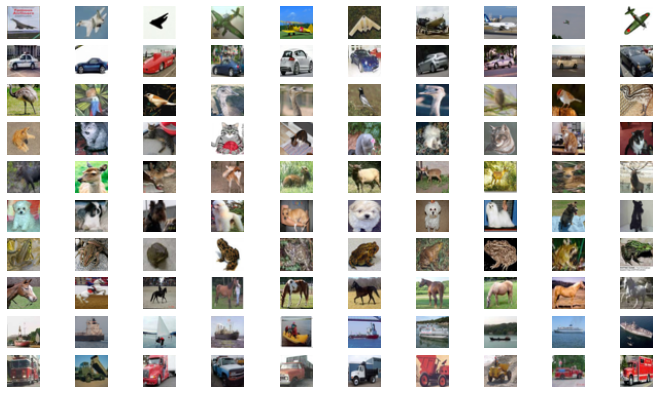

training input shape :  (50000, 32, 32, 3)
training output shape:  (50000, 1)
testing input shape  :  (10000, 32, 32, 3)
testing output shape :  (10000, 1)


In [3]:
def show_imgs(X,y):
    plt.figure(1, figsize=(12,7))
    k = 0
    for i in range(0,10):
        for j in range(0,10):
            while y[k] != i: k += 1
            plt.subplot2grid((10,10),(i,j))
            plt.imshow(X[k])
            plt.axis('off')
            k += 1
    plt.show()

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
show_imgs(X_test, y_test)
print('training input shape : ', X_train.shape)
print('training output shape: ', y_train.shape)
print('testing input shape  : ', X_test.shape)
print('testing output shape : ', y_test.shape)

### Preprocessing data
After loading and splitting the data, we need to preprocess them by reshaping them into the shape the network expects and scaling them so that all values are in the \[0, 1\] interval.

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [5]:
n_classes = 10
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Define the network
The neural network will be a CNN. Follow the structure given in the exercise 1.

In [6]:
input_shape=X_train.shape[1:]

def create_model() -> Sequential:
    cnn = Sequential(name='PW_07_1')

    cnn.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=input_shape))
    cnn.add(ReLU())

    cnn.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=input_shape))
    cnn.add(ReLU())
    cnn.add(MaxPooling2D(pool_size=(2, 2)))

    cnn.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=input_shape))
    cnn.add(ReLU())
    cnn.add(MaxPooling2D(pool_size=(2, 2)))

    cnn.add(Flatten())
    cnn.add(Dense(units=n_classes, activation='softmax'))
    return cnn



In [7]:
def plot_metrics(logs):
    f = plt.figure(figsize=(12,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.plot(logs.history['loss'], label='Training loss')
    ax1.plot(logs.history['val_loss'], label='Testing loss')
    ax1.legend()
    ax1.grid()
    ax2.plot(logs.history['accuracy'], label='Training acc')
    ax2.plot(logs.history['val_accuracy'], label='Testing acc')
    ax2.legend()
    ax2.grid()
    plt.show()

In [8]:
cnn_plain = create_model()
cnn_plain.summary()

Model: "PW_07_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 re_lu_1 (ReLU)              (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                           

2022-04-09 10:28:26.866293: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Compile and train the network

When compiling the model, we need to specify the loss function, the optimizer and the metrics we want to track during the training. In Keras, we need to call the methods `compile()` and `fit()`. We will train through E epochs, using batches of size B, as specified in the exercise 1.

- The `categorical_crossentropy` loss is relevant for multiclass, single-label classification problem. Categorical is used because there are 10 classes to predict from. If there were 2 classes, we would have used `binary_crossentropy`.
- The `adam` optimizer is an improvement over SGD(Stochastic Gradient Descent). The optimizer is defining the update rule for the weights of the neurons during backpropagation gradients.

In [9]:
batch_size: int = 128
optimizer: str = 'adam'
loss_function: str = 'categorical_crossentropy'
metrics: list[str] = ['accuracy']
epochs: int = 10


In [10]:
cnn_plain.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)
log = cnn_plain.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 43s 120ms/step - loss: 1.5771 - accuracy: 0.4343 - val_loss: 1.3051 - val_accuracy: 0.5484
Epoch 2/10
352/352 [==============================] - 51s 146ms/step - loss: 1.2149 - accuracy: 0.5744 - val_loss: 1.1180 - val_accuracy: 0.6186
Epoch 3/10
352/352 [==============================] - 50s 142ms/step - loss: 1.0600 - accuracy: 0.6323 - val_loss: 1.0385 - val_accuracy: 0.6410
Epoch 4/10
352/352 [==============================] - 47s 133ms/step - loss: 0.9637 - accuracy: 0.6665 - val_loss: 0.9574 - val_accuracy: 0.6738
Epoch 5/10
352/352 [==============================] - 48s 136ms/step - loss: 0.8999 - accuracy: 0.6882 - val_loss: 0.8947 - val_accuracy: 0.6902
Epoch 6/10
352/352 [==============================] - 47s 134ms/step - loss: 0.8515 - accuracy: 0.7065 - val_loss: 0.8836 - val_accuracy: 0.7044
Epoch 7/10
352/352 [==============================] - 50s 142ms/step - loss: 0.8024 - accuracy: 0.7215 - val_loss: 0.8657 - val_ac

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss and accuracy evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

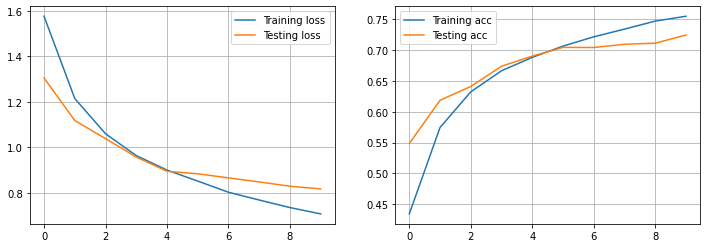

In [11]:
plot_metrics(log)

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [12]:
loss_test, accuracy_test = cnn_plain.evaluate(X_test, Y_test)

print(f"Loss Test: {loss_test}")
print(f"Accuracy Test: {accuracy_test}")

313/313 [==============================] - 2s 6ms/step - loss: 0.8443 - accuracy: 0.7106
Loss Test: 0.8442751169204712
Accuracy Test: 0.7106000185012817


### Confusion matrix
We can call the `predict()` function to get the predicted classes. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

tf.Tensor(
[[751  18  35  22  13   6   7  12  91  45]
 [ 13 833   5   5   1   4   4   2  35  98]
 [ 89   6 526  59 109  80  57  40  21  13]
 [ 29  11  66 474  74 188  51  40  42  25]
 [ 30   6  62  43 658  47  50  76  22   6]
 [ 12   4  46 136  52 651  19  52  16  12]
 [  7   5  41  58  41  29 779   7  22  11]
 [ 20   3  24  28  61  61   3 773   5  22]
 [ 66  40   9  10   2   6   5   2 830  30]
 [ 24  72   3  10   4   4   7  14  31 831]], shape=(10, 10), dtype=int32)



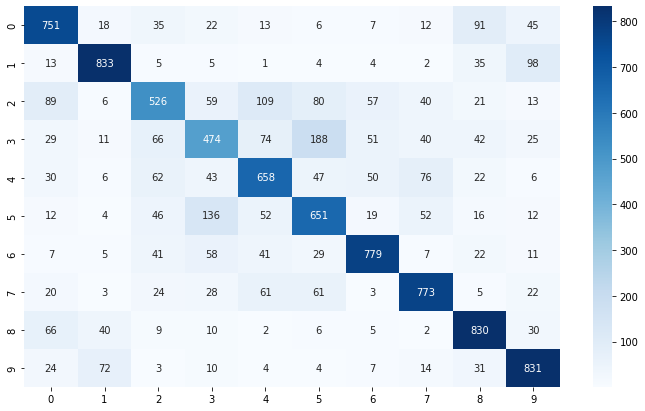

In [13]:
pred = cnn_plain.predict(X_test, verbose=0)
pred = np.argmax(pred, axis=-1)
conf_matrix = confusion_matrix(y_test, pred)

print(conf_matrix)
print()


fig = plt.figure(figsize=(12, 7))
sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='d')
plt.show()

## Data Augmentation

Overfitting can be caused by having networks with too many parameters that are trained on too few samples. Through training, the model learns *by hart* and generalizes poorly.

**Data augmentation** takes the approach of generating artificially more training data from existing training samples. For images, data augmentation is performed via a number of random transformations that yield believable-looking images. The goal is that at training time, the model will not see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ```ImageDataGenerator``` instance.

- rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- shear_range is for randomly applying shearing transformations.
- zoom_range is for randomly zooming inside pictures.

In [14]:
# Define the data augmentation pipelines, one for train set, one for test set
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.85)

gen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.08
)

batches = gen.flow(X_train, Y_train, batch_size=batch_size)
val_batches = gen.flow(X_val, Y_val, batch_size=batch_size)

Don't forget to reset your network (by defining it again). You need then to compile the network and train it. The call to the `fit()` function has to be replaced by a call to `fit_generator()` and using the data flow defined above. 

In [15]:
# Compile and train the network

cnn_augment = create_model()

cnn_augment.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

log_augment = cnn_augment.fit(batches,
                steps_per_epoch=X_train.shape[0]//batch_size,
                validation_data=val_batches,
                validation_steps=X_val.shape[0]//batch_size,
                epochs=epochs,
                verbose=1)


Epoch 1/10
332/332 [==============================] - 51s 153ms/step - loss: 1.7083 - accuracy: 0.3830 - val_loss: 1.5022 - val_accuracy: 0.4666
Epoch 2/10
332/332 [==============================] - 53s 160ms/step - loss: 1.4149 - accuracy: 0.4947 - val_loss: 1.3253 - val_accuracy: 0.5353
Epoch 3/10
332/332 [==============================] - 51s 155ms/step - loss: 1.2886 - accuracy: 0.5450 - val_loss: 1.2360 - val_accuracy: 0.5667
Epoch 4/10
332/332 [==============================] - 54s 161ms/step - loss: 1.2007 - accuracy: 0.5791 - val_loss: 1.1594 - val_accuracy: 0.5870
Epoch 5/10
332/332 [==============================] - 50s 152ms/step - loss: 1.1397 - accuracy: 0.6007 - val_loss: 1.0910 - val_accuracy: 0.6220
Epoch 6/10
332/332 [==============================] - 52s 157ms/step - loss: 1.0778 - accuracy: 0.6237 - val_loss: 1.0800 - val_accuracy: 0.6259
Epoch 7/10
332/332 [==============================] - 52s 158ms/step - loss: 1.0475 - accuracy: 0.6336 - val_loss: 1.0449 - val_ac

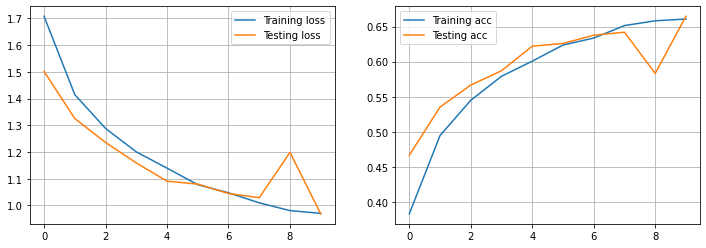

In [16]:
plot_metrics(log_augment)

In [17]:
loss_test_augment, metric_test_augment = cnn_augment.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test_augment)
print('Test accuracy:', metric_test_augment)

Test loss: 0.9509804844856262
Test accuracy: 0.6689000129699707


### Alternative

In [18]:
from keras import layers

augment = Sequential([
    layers.RandomRotation(factor=0.15),
    layers.RandomZoom(height_factor=0.1, width_factor=0.1),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
], name='image_augmentation')

cnn3 = create_model()

cnn3_augment = Sequential([*augment.layers, *cnn3.layers])

In [19]:
cnn3_augment.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

log_cnn3_augment = cnn3_augment.fit(batches,
                      steps_per_epoch=X_train.shape[0]//batch_size,
                      validation_data=val_batches,
                      validation_steps=X_val.shape[0]//batch_size,
                      epochs=epochs,
                      verbose=1)

Epoch 1/10
332/332 [==============================] - 54s 160ms/step - loss: 1.8584 - accuracy: 0.3250 - val_loss: 1.6628 - val_accuracy: 0.3972
Epoch 2/10
332/332 [==============================] - 52s 155ms/step - loss: 1.6715 - accuracy: 0.3997 - val_loss: 1.5984 - val_accuracy: 0.4375
Epoch 3/10
332/332 [==============================] - 52s 156ms/step - loss: 1.5991 - accuracy: 0.4271 - val_loss: 1.4626 - val_accuracy: 0.4902
Epoch 4/10
332/332 [==============================] - 58s 174ms/step - loss: 1.5579 - accuracy: 0.4440 - val_loss: 1.4747 - val_accuracy: 0.4864
Epoch 5/10
332/332 [==============================] - 64s 191ms/step - loss: 1.5092 - accuracy: 0.4599 - val_loss: 1.4178 - val_accuracy: 0.5034
Epoch 6/10
332/332 [==============================] - 63s 188ms/step - loss: 1.4741 - accuracy: 0.4755 - val_loss: 1.4541 - val_accuracy: 0.4890
Epoch 7/10
332/332 [==============================] - 61s 185ms/step - loss: 1.4572 - accuracy: 0.4818 - val_loss: 1.4358 - val_ac

In [20]:
print(log_cnn3_augment.history)

{'loss': [1.8583662509918213, 1.6715368032455444, 1.5991203784942627, 1.5578501224517822, 1.5092395544052124, 1.474123477935791, 1.457231879234314, 1.417716383934021, 1.4007302522659302, 1.3746235370635986], 'accuracy': [0.3250259459018707, 0.39972150325775146, 0.4271452724933624, 0.44404324889183044, 0.4599027633666992, 0.4754790961742401, 0.48178040981292725, 0.4962947368621826, 0.5028084516525269, 0.5134758949279785], 'val_loss': [1.6628483533859253, 1.5984193086624146, 1.4626365900039673, 1.4746912717819214, 1.4178225994110107, 1.4541420936584473, 1.4357553720474243, 1.4066526889801025, 1.3381314277648926, 1.4880067110061646], 'val_accuracy': [0.39722520112991333, 0.4375, 0.4901670217514038, 0.4863954782485962, 0.5033674836158752, 0.4889547526836395, 0.4990571141242981, 0.5171066522598267, 0.5385237336158752, 0.509159505367279]}


In [21]:
loss_test_cnn3_augment, metric_test_cnn3_augment = cnn_augment.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test_cnn3_augment)
print('Test accuracy:', metric_test_cnn3_augment)

Test loss: 0.9509804844856262
Test accuracy: 0.6689000129699707


### Evaluating further augmenting parameters
In order to get a feeling of possible parameters further DA parameters should be tested on the same architecture.


 -----------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------ Training model # 1 ------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------- 

----------------------------------------------------------------------------------
----------------------------------- Configs -------------------------------------
rotation_range: 6
shift_range: 0.15930859737204658
height_shift_range: 0.03668695797323276
zoom_range: 0.15593820005455386
---------------------------------------------------------------------------------- 

Epoch 1/10
332/332 [==============================] - 61s 181ms/step - loss: 1.7788 - accuracy: 0.3544 - val_loss: 1.6008 - val_accuracy: 0.4170
Epoch 2/10
332/332 [==============================] - 56s 168ms/step - loss: 1.5028 - accur

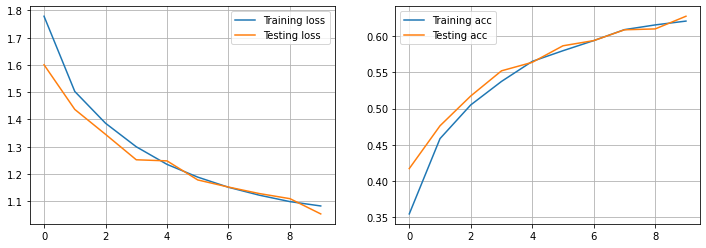


 ----------------------------------------------------------------------------------
-------------------------------- Test evaluation ---------------------------------
---------------------------------------------------------------------------------- 

Test loss: 0.9913519620895386
Test accuracy: 0.6651999950408936
INFO:tensorflow:Assets written to: ./models/cnn_augment_1/assets

 -----------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------ Training model # 2 ------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------- 

----------------------------------------------------------------------------------
----------------------------------- Configs -------------------------------------
rotation_range: 16
shift_range: 0.17073760211739025
height_shi

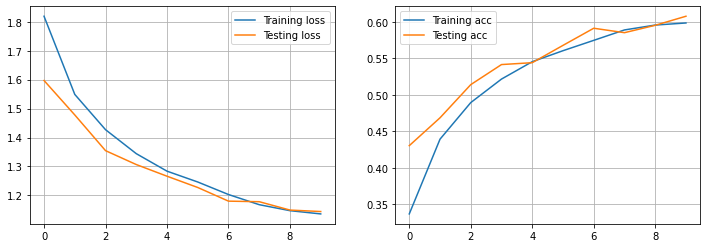


 ----------------------------------------------------------------------------------
-------------------------------- Test evaluation ---------------------------------
---------------------------------------------------------------------------------- 

Test loss: 1.0554280281066895
Test accuracy: 0.6428999900817871
INFO:tensorflow:Assets written to: ./models/cnn_augment_2/assets

 -----------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------ Training model # 3 ------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------- 

----------------------------------------------------------------------------------
----------------------------------- Configs -------------------------------------
rotation_range: 5
shift_range: 0.07047685739762717
height_shif

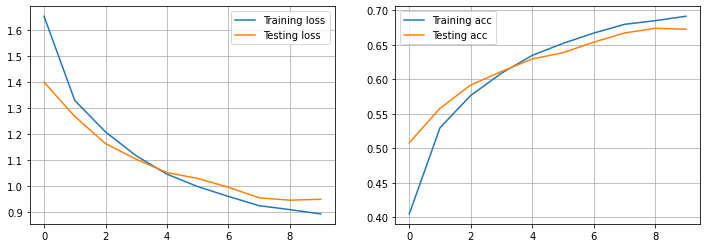


 ----------------------------------------------------------------------------------
-------------------------------- Test evaluation ---------------------------------
---------------------------------------------------------------------------------- 

Test loss: 0.9860560297966003
Test accuracy: 0.670799970626831
INFO:tensorflow:Assets written to: ./models/cnn_augment_3/assets

 -----------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------ Training model # 4 ------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------- 

----------------------------------------------------------------------------------
----------------------------------- Configs -------------------------------------
rotation_range: 6
shift_range: 0.06233269921392799
height_shift

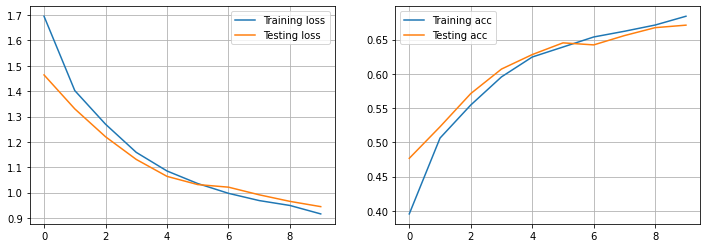


 ----------------------------------------------------------------------------------
-------------------------------- Test evaluation ---------------------------------
---------------------------------------------------------------------------------- 

Test loss: 0.920917272567749
Test accuracy: 0.6823999881744385
INFO:tensorflow:Assets written to: ./models/cnn_augment_4/assets

 -----------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------ Training model # 5 ------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------- 

----------------------------------------------------------------------------------
----------------------------------- Configs -------------------------------------
rotation_range: 13
shift_range: 0.14498518145646397
height_shif

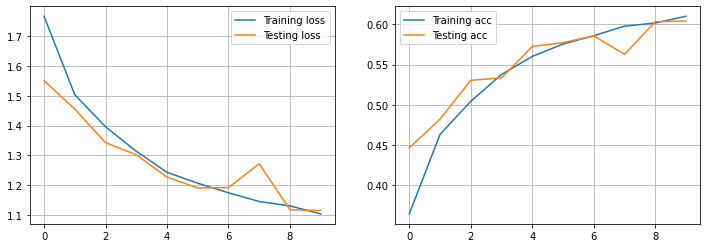


 ----------------------------------------------------------------------------------
-------------------------------- Test evaluation ---------------------------------
---------------------------------------------------------------------------------- 

Test loss: 0.9782519340515137
Test accuracy: 0.6589999794960022
INFO:tensorflow:Assets written to: ./models/cnn_augment_5/assets


In [33]:
np.random.seed(42)

num_evaluations = np.arange(0, 5)

for idx in num_evaluations:

    print("\n", "-----------------------------------------------------------------------------------------------------------------------------------")
    print(f"------------------------------------------------ Training model # {idx + 1} ------------------------------------------------------")
    print("-----------------------------------------------------------------------------------------------------------------------------------", "\n")



    rotation_range = np.random.randint(0, 20)
    shift_range=np.random.uniform(0, 0.2)
    height_shift_range=np.random.uniform(0, 0.2)
    zoom_range=np.random.uniform(0, 0.2)
    brightness_range=[np.random.uniform(0, 0.2), np.random.uniform(0.2, 1.5)]
    horizontal_flip=np.random.choice(a=[True, False], size=1)[0]
    vertical_flip=np.random.choice(a=[True, False], size=1)[0]

    print("----------------------------------------------------------------------------------")
    print(f"----------------------------------- Configs -------------------------------------")
    print("rotation_range:", rotation_range)
    print("shift_range:", shift_range)
    # print("height_shift_range:", height_shift_range)
    print("zoom_range:", zoom_range)
    # print("brightness_range:", brightness_range)
    # print("horizontal_flip:", horizontal_flip)
    # print("vertical_flip:", vertical_flip)
    print("----------------------------------------------------------------------------------", "\n")

    gen_rand = ImageDataGenerator(
        rotation_range=rotation_range,
        width_shift_range=shift_range,
        height_shift_range=shift_range,
        zoom_range=zoom_range,
        # brightness_range=brightness_range,
        # horizontal_flip=horizontal_flip,
        # vertical_flip=vertical_flip
    )

    batches = gen_rand.flow(X_train, Y_train, batch_size=batch_size)
    val_batches = gen_rand.flow(X_val, Y_val, batch_size=batch_size)

    cnn_rand = create_model()

    cnn_rand.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

    log_rand = cnn_rand.fit(batches,
                            steps_per_epoch=X_train.shape[0]//batch_size,
                            validation_data=val_batches,
                            validation_steps=X_val.shape[0]//batch_size,
                            epochs=epochs,
                            verbose=1)


    print("\n", "----------------------------------------------------------------------------------")
    print("----------------------------------- Metrics --------------------------------------")
    print("----------------------------------------------------------------------------------", "\n")
    plot_metrics(log_rand)

    print("\n","----------------------------------------------------------------------------------")
    print("-------------------------------- Test evaluation ---------------------------------")
    print("----------------------------------------------------------------------------------", "\n")

    loss_test_rand, metric_test_rand = cnn_rand.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss_test_rand)
    print('Test accuracy:', metric_test_rand)

    cnn_rand.save(f"./models/cnn_augment_{idx + 1}")

In [23]:
print(np.arange(0, 10))

[0 1 2 3 4 5 6 7 8 9]


### Table of results

Describe your data augmentation strategies here.

### Architecture description
1. CONV(32F,same)-RELU-CONV(32F,same)-RELU-MAXP(2)-CONV(32F,same)-RELU-MAXP(2)-DENSE

| CNN                                                          | Architecture | Acc. train | Acc. val | Acc. test |
|--------------------------------------------------------------|--------------|------------|----------|-----------|
| No DA                                                        | 1            | 0.7549     | 0.7244   | 0.7106    |
| rotation_range:   6, shift_range: 0.1593, zoom_range: 0.1559 | 1            | 0.6209     | 0.6276   | 0.6651    |
| rotation_range:  16, shift_range: 0.1707, zoom_range: 0.0322 | 1            | 0.5983     | 0.6075   | 0.6429    |
| rotation_range:   5, shift_range: 0.0705, zoom_range: 0.0363 | 1            | 0.6914     | 0.6725   | 0.6708    |
| rotation_range:   6, shift_range: 0.0623, zoom_range: 0.1639 | 1            | 0.6841     | 0.6711   | 0.6824    |
| rotation_range:  13, shift_range: 0.1450, zoom_range: 0.1753 | 1            | 0.6102     | 0.6043   | 0.6590    |

### Interpretation

a)
Unfortunately we couldn't reach a better performance with a random approach. We also tried it with more iterations than represented in the table above.
But it never exceeded the accuracy of 0.71 on the test set as in the training without augmentation.

b)
If we compare the evolution over the epochs between training with and without augmentation, we can observe that with augmentation the accuracy
on the validation set mostly sticks much more to the accuracy on the training set. Moreover, it experiences fewer spikes during training.

c)
First, we used even more augmentation techniques like flipping and brightness adjustments. But to our surprise especially with brightness adjustments the performance
dropped significantly. In the end we could obtain the best result with just using `rotation`, `shift_range` and `zoom_range`.

